# [개념정리]

## 03. 앙상블 학습 : 여러 개의 분류키(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도축하는 기법

-- 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻음 
-- 정형 데이터 분류 시에서는 앙상블이 good 
-- 랜덤 포레스트와 그래디언트 부스팅 알고리즘이 많이 이용됨 + XGBoost, LightGBM
-- 전반적으로 뛰어난 예측 성능을 가지고 있음.
-- 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에서 끌어낼 수 있음

## 앙상블의 학습 유형 
-- 보팅 (Voting) : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식. 서로 다른 알고리즘을 가진 분류기를 결합. 그러나 여러 개의 분류기를 결합한다고 해서 무조건 예측 성능이 향상되는 것은 아님.
-- 배깅 (Bagging) : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식. 각각의 분류기(개별 분류기에 할당 학습데이터가 원본 학습 데이터를 샘플링해 추출하는데 이것을 부트스트래핑 (Bootstrapping) 이라고 한다) 가 모두 같은 유형의 알고리즘 기반이나 데이터 샘플링을 서로 다르게 가져가며 학습을 수행해 보팅을 하는 방법.  - 랜덤 포레스트 알고리즘

## 보팅 유형
-- 하드 보팅 : 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정.
-- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균하여 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정. 예측 성능이 좋아서 일반적으로 적용되는 방법임.
-- VotingClassifier 클래스 이용

## 04. 랜던 포레스트 : 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 예측 결정 하는 방식
-- 앙상블 알고리즘 중 빠른 수행 속도를 가지고 다양한 영역에서 높은 예측 성능을 보임.
-- base 알고리즘은 결정 트리. -> 쉽고 직관적임
-- 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임 - bootstrapping
-- RandomForestClassifier 클래스 이용 

## 랜덤 포레스트 하이퍼 파라미터 및 튜닝 
-- n_estimators : 결정 트리의 개수 지정. 10개가 기본. 무조건 증가시킨다고 성능이 향상되는 것은 아님.
-- max_features 
-- max_depth, min_sample_leaf, min_samples_split : 과적합을 개선하기 위해 사용 

## 05. GBM(Gradient Boosting Machine) 
-- 가중치 업데이트를 경사 하강법을 이용하는 것. 
-- 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법 
-- GradientBoostingClassifier 클래스 이용
-- 멀티 CPU 코어 시스템을 사용하더라도 병렬 처리가 지원되지 않아 대용량의 데이터 학습에 시간 소요 큼.

## 06. XGBoost
-- 병렬 학습 가능!
-- 예측 성능이 뛰어나고, 과적합 규제, 내장된 교차 검증, 결손값 자체 처리 가능

In [7]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [8]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2,random_state=156)

# VotingClassifier 학습 / 예측 / 평가
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델 학습 / 예측 / 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


In [9]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                              if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df 

In [10]:
import pandas as pd

def get_human_dataset() : 
    feature_name_df = pd.read_csv('/Users/josoobin/downloads/features.txt', sep='\s+',
                                  header=None, names=['column_index','column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv('/Users/josoobin/downloads/X_train.txt', sep='\s+', header=None, names=feature_name)
    X_test = pd.read_csv('/Users/josoobin/downloads/X_test.txt', sep='\s+', header=None, names=feature_name)
    y_train = pd.read_csv('/Users/josoobin/downloads/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/Users/josoobin/downloads/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset() 을 이용해 학습 / 테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9192


In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8,16,24],
    'min_samples_leaf' : [1,6,12],
    'min_samples_split' : [2,8,16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector 

최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9162


In [13]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9264


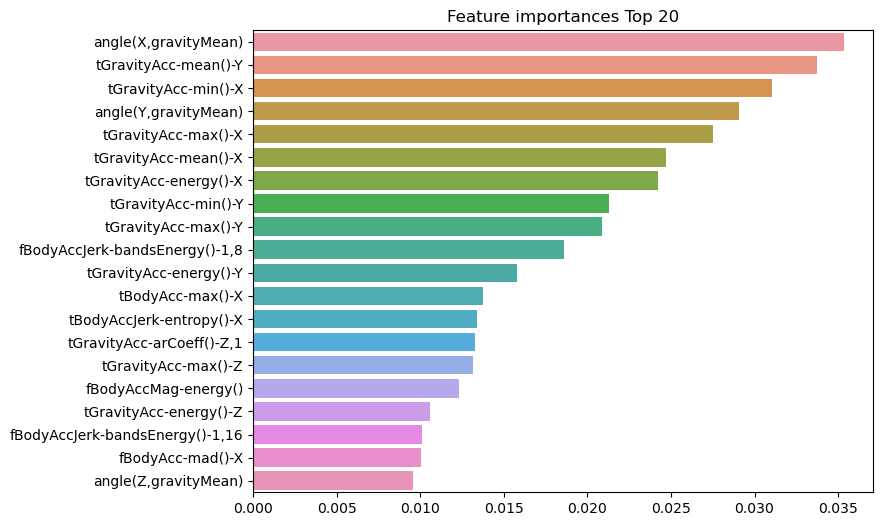

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred =gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f} 초'.format(time.time() - start_time))

GBM 정확도 : 0.9561
GBM 수행 시간 : 318.1 초


In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

In [45]:
import xgboost

print(xgboost.__version__)

3.0.0


In [47]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [49]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [51]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [53]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [55]:
params = {'max_depth' : 3,
          'eta' : 0.05,
          'objective' : 'binary:logistic',
          'eval_metric' : 'logloss'
         }
num_rounds = 400

In [57]:
# 학습 데이터셋은 'train' 또는 평가 데이터셋은 'eval'로 명기합니다.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')]만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds, \
                      early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.62473	eval-logloss:0.63088
[1]	train-logloss:0.58662	eval-logloss:0.60461
[2]	train-logloss:0.55210	eval-logloss:0.58205
[3]	train-logloss:0.52068	eval-logloss:0.56165
[4]	train-logloss:0.49173	eval-logloss:0.54101
[5]	train-logloss:0.46517	eval-logloss:0.52206
[6]	train-logloss:0.44009	eval-logloss:0.50271
[7]	train-logloss:0.41646	eval-logloss:0.48606
[8]	train-logloss:0.39505	eval-logloss:0.46961
[9]	train-logloss:0.37523	eval-logloss:0.45485
[10]	train-logloss:0.35682	eval-logloss:0.44120
[11]	train-logloss:0.33964	eval-logloss:0.43123
[12]	train-logloss:0.32279	eval-logloss:0.41962
[13]	train-logloss:0.30783	eval-logloss:0.40848
[14]	train-logloss:0.29308	eval-logloss:0.39857
[15]	train-logloss:0.27928	eval-logloss:0.38945
[16]	train-logloss:0.26681	eval-logloss:0.38171
[17]	train-logloss:0.25498	eval-logloss:0.37381
[18]	train-logloss:0.24352	eval-logloss:0.36656
[19]	train-logloss:0.23307	eval-logloss:0.36014
[20]	train-logloss:0.22290	eval-logloss:0.35395
[2

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [61]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값을 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.776 0.058 0.975 1.    0.999 0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [63]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,    F1: 0.9740, AUC: 0.9965


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

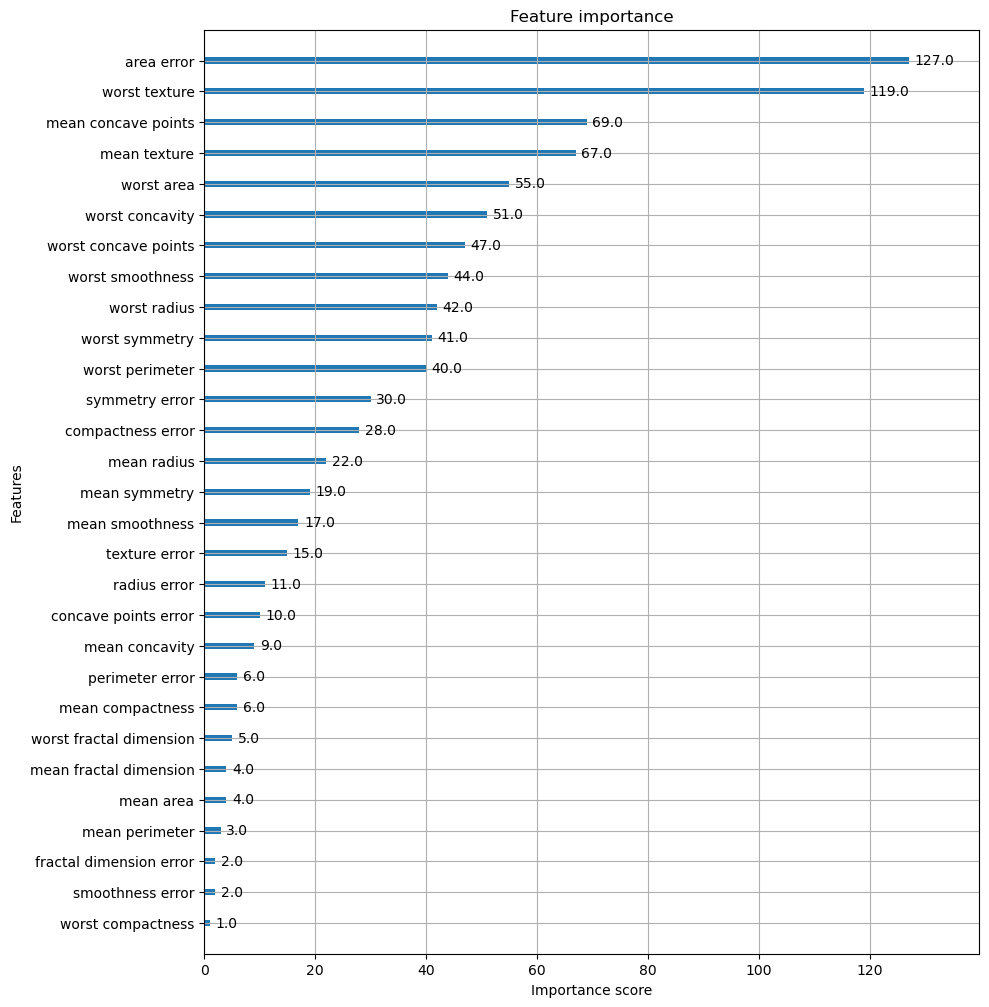

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [67]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# warning 메세지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                            eval_metric='logloss')
xgb_wrapper.fit(X_train,y_train,verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [69]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC: 0.9951


### 최신버전 XGboost에서는 코드가 상이함 

In [72]:
import xgboost as xgb
from xgboost.callback import EarlyStopping

# DMatrix로 변환
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# 파라미터 설정
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'max_depth': 3,
    'eval_metric': 'logloss'
}

# 평가 세트
evals = [(dtrain, 'train'), (dval, 'validation')]

# early stopping 콜백 정의
early_stop = EarlyStopping(rounds=50, save_best=True)

# 학습
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=400,
    evals=evals,
    callbacks=[early_stop]
)

# 예측
preds = xgb_model.predict(dtest)
pred_labels = [1 if p > 0.5 else 0 for p in preds]

[0]	train-logloss:0.62473	validation-logloss:0.63088
[1]	train-logloss:0.58662	validation-logloss:0.60461
[2]	train-logloss:0.55210	validation-logloss:0.58205
[3]	train-logloss:0.52068	validation-logloss:0.56165
[4]	train-logloss:0.49173	validation-logloss:0.54101
[5]	train-logloss:0.46517	validation-logloss:0.52206
[6]	train-logloss:0.44009	validation-logloss:0.50271
[7]	train-logloss:0.41646	validation-logloss:0.48606
[8]	train-logloss:0.39505	validation-logloss:0.46961
[9]	train-logloss:0.37523	validation-logloss:0.45485
[10]	train-logloss:0.35682	validation-logloss:0.44120
[11]	train-logloss:0.33964	validation-logloss:0.43123
[12]	train-logloss:0.32279	validation-logloss:0.41962
[13]	train-logloss:0.30783	validation-logloss:0.40848
[14]	train-logloss:0.29308	validation-logloss:0.39857
[15]	train-logloss:0.27928	validation-logloss:0.38945
[16]	train-logloss:0.26681	validation-logloss:0.38171
[17]	train-logloss:0.25498	validation-logloss:0.37381
[18]	train-logloss:0.24352	validation-

In [74]:
get_clf_eval(y_test, pred_labels, preds)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,    F1: 0.9740, AUC: 0.9965


In [76]:
import xgboost as xgb
from xgboost.callback import EarlyStopping

# DMatrix로 변환
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# 파라미터 설정
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'max_depth': 3,
    'eval_metric': 'logloss'
}

# 평가 세트
evals = [(dtrain, 'train'), (dval, 'validation')]

# early stopping 콜백 정의
early_stop = EarlyStopping(rounds=10, save_best=True)

# 학습
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=400,
    evals=evals,
    callbacks=[early_stop]
)

# 예측
preds = xgb_model.predict(dtest)
pred_labels = [1 if p > 0.5 else 0 for p in preds]

[0]	train-logloss:0.62473	validation-logloss:0.63088
[1]	train-logloss:0.58662	validation-logloss:0.60461
[2]	train-logloss:0.55210	validation-logloss:0.58205
[3]	train-logloss:0.52068	validation-logloss:0.56165
[4]	train-logloss:0.49173	validation-logloss:0.54101
[5]	train-logloss:0.46517	validation-logloss:0.52206
[6]	train-logloss:0.44009	validation-logloss:0.50271
[7]	train-logloss:0.41646	validation-logloss:0.48606
[8]	train-logloss:0.39505	validation-logloss:0.46961
[9]	train-logloss:0.37523	validation-logloss:0.45485
[10]	train-logloss:0.35682	validation-logloss:0.44120
[11]	train-logloss:0.33964	validation-logloss:0.43123
[12]	train-logloss:0.32279	validation-logloss:0.41962
[13]	train-logloss:0.30783	validation-logloss:0.40848
[14]	train-logloss:0.29308	validation-logloss:0.39857
[15]	train-logloss:0.27928	validation-logloss:0.38945
[16]	train-logloss:0.26681	validation-logloss:0.38171
[17]	train-logloss:0.25498	validation-logloss:0.37381
[18]	train-logloss:0.24352	validation-

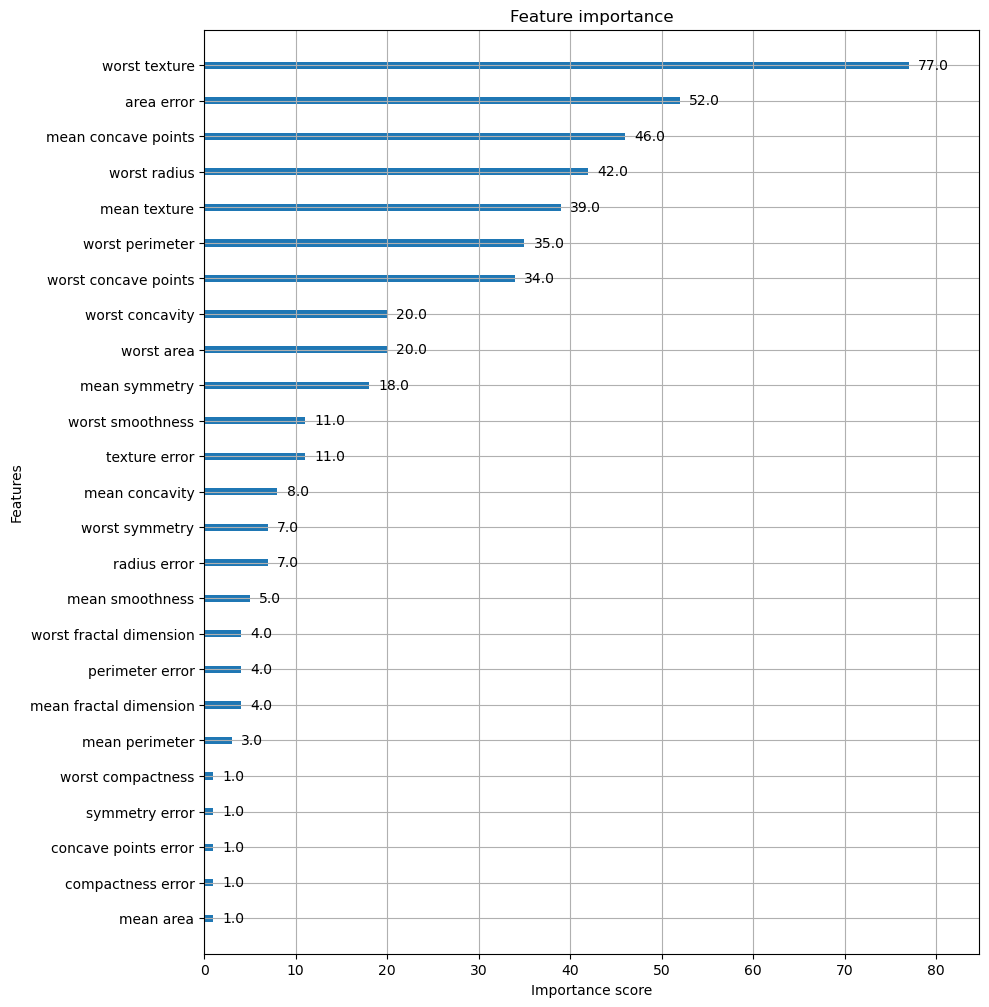

In [78]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot_importance는 Booster 객체나 XGBClassifier 모두에서 사용 가능!
# 사이킷런 래퍼 클래스를 입력해도 무방.
fig, ax = plt.subplots(figsize=(10, 12))  # 원하는 크기로 설정
plot_importance(xgb_model, ax=ax)         # Booster 객체 xgb_model 사용
plt.show()